In [2]:
#Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_df = pd.read_csv(r"C:\Users\vpapn\Documents\mydocs\Assignment\Uber Request Data.csv")
#Check basic information of data available example - datatypes, frequeny counts of NUll values, total number of rows and total numbefr of Not Null rows for each column
data_df.info() 
# I found that only fields - 'Driver Id' and 'Drop Timestamp' are NULL. As count is different from total count of Dataframe
data_df.head() #Check sample records from dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
#I see that Driver id has been taken as float64 by default but it should be treated like a int. 
#So changing its dtype explicitly.

data_df['Driver id'] = data_df['Driver id'].fillna(-1)
data_df['Driver id'] = data_df['Driver id'].astype('int')
print(data_df.head())
print(data_df.info())

   Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport          1  Trip Completed      11/7/2016 11:51   
1         867      Airport          1  Trip Completed      11/7/2016 17:57   
2        1807         City          1  Trip Completed       12/7/2016 9:17   
3        2532      Airport          1  Trip Completed      12/7/2016 21:08   
4        3112         City          1  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            6745 non-null int32
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: int32(1), int64(1

In [5]:
pd.set_option('display.max_columns',0)
#Analyze data where do we have missing values. If yes, do we need them for our analysis. If not, we can remove such rows.
null_data = data_df[data_df.isnull().any(axis=1)]
print(null_data.head())


      Request id Pickup point  Driver id     Status    Request timestamp Drop timestamp
2831        2905         City          1  Cancelled  13-07-2016 06:08:41            NaN
2832        4805         City          1  Cancelled  14-07-2016 17:07:58            NaN
2833        5202      Airport          1  Cancelled  14-07-2016 20:51:37            NaN
2834        5927         City          1  Cancelled  15-07-2016 10:12:40            NaN
2835        2347      Airport          2  Cancelled      12/7/2016 19:14            NaN


In [6]:
print(null_data.loc[(null_data.Status!='Cancelled') & (null_data.Status!='No Cars Available')])
#After analysis, I found that Driver ID and Drop timestamp values are missign only if Status is either equal to Cancelled  
# or No Cars Available.
# As we will need this Cancelled and Cars not available data in our analysis, I will not remove this data.

Empty DataFrame
Columns: [Request id, Pickup point, Driver id, Status, Request timestamp, Drop timestamp]
Index: []


In [7]:
#Changing Request timestamp and drop timestamp column format from object to Datetime
data_df['Request timestamp'] = pd.to_datetime(data_df['Request timestamp'] ) 
data_df['Drop timestamp'] = pd.to_datetime(data_df['Drop timestamp'] ) 
#print(data_df.head())
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            6745 non-null int32
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB
None


In [8]:
#Now we will fetch Weekday information and hour information from request timestamp
from datetime import date
import calendar
data_df['Day'] = data_df['Request timestamp'].dt.weekday_name
data_df['req_hour'] = data_df['Request timestamp'].dt.hour
print(data_df.head(20))
#help(data_df['Request timestamp'].dt)


    Request id Pickup point  Driver id          Status   Request timestamp      Drop timestamp        Day  req_hour
0          619      Airport          1  Trip Completed 2016-11-07 11:51:00 2016-11-07 13:00:00     Monday        11
1          867      Airport          1  Trip Completed 2016-11-07 17:57:00 2016-11-07 18:47:00     Monday        17
2         1807         City          1  Trip Completed 2016-12-07 09:17:00 2016-12-07 09:58:00  Wednesday         9
3         2532      Airport          1  Trip Completed 2016-12-07 21:08:00 2016-12-07 22:03:00  Wednesday        21
4         3112         City          1  Trip Completed 2016-07-13 08:33:16 2016-07-13 09:25:47  Wednesday         8
5         3879      Airport          1  Trip Completed 2016-07-13 21:57:28 2016-07-13 22:28:59  Wednesday        21
6         4270      Airport          1  Trip Completed 2016-07-14 06:15:32 2016-07-14 07:13:15   Thursday         6
7         5510      Airport          1  Trip Completed 2016-07-15 05:11:

In [9]:
#Now we will check total number of different status in each hour of the day
pd.set_option('display.max_rows',500)
data_to_check_count = data_df[['Status', 'Pickup point','req_hour']]
grouped_data_to_check_count = data_to_check_count.groupby(['req_hour','Status'])
print(grouped_data_to_check_count.count())

                            Pickup point
req_hour Status                         
0        Cancelled                     3
         No Cars Available            56
         Trip Completed               40
1        Cancelled                     4
         No Cars Available            56
         Trip Completed               25
2        Cancelled                     5
         No Cars Available            57
         Trip Completed               37
3        Cancelled                     2
         No Cars Available            56
         Trip Completed               34
4        Cancelled                    51
         No Cars Available            74
         Trip Completed               78
5        Cancelled                   176
         No Cars Available            84
         Trip Completed              185
6        Cancelled                   145
         No Cars Available            86
         Trip Completed              167
7        Cancelled                   169
         No Cars

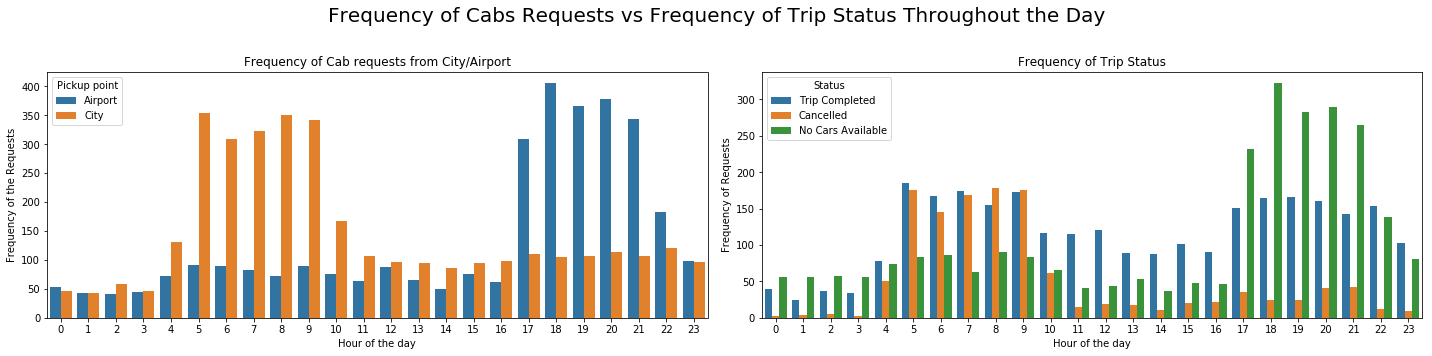

In [45]:
#Same we will plot -total number of different status in each hour of the day and from each pickup point

fig = plt.figure(figsize=(20,5))
fig.suptitle('Frequency of Cabs Requests vs Frequency of Trip Status Throughout the Day', fontsize=20)
plt.subplot(121)
sns.countplot(x='req_hour',hue='Pickup point',data = data_df)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of the Requests')
plt.title('Frequency of Cab requests from City/Airport')
plt.subplot(122)
sns.countplot(x='req_hour',hue='Status',data = data_df)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of Requests')
plt.title('Frequency of Trip Status')
fig.tight_layout()
fig.subplots_adjust(top=0.80)
plt.show()

#After plotting below plot, I came to know that, there is huge demand from 5AM to 9AM of cabs from City
#and huge demand is there from 5PM to 9PM from Airport.
#But with that, I also see that from 5PM to 9PM, cars are mostly not available and from 5AM to 9AM, equal number of cars 
#complete the trips and trips are cancelled as well.
#Lets dig this further.

In [12]:
#Calculating different Timeslots of day
def check_req_slot(req_hour):
    if ((req_hour>=4) &(req_hour<8)):
        slot ="Early Morning" 
    elif((req_hour>=8) &(req_hour<12)):
        slot ="Morning"
    elif((req_hour>=12) &(req_hour<16)):
        slot ="Afternoon"
    elif((req_hour>=16) &(req_hour<20)):
        slot ="Evening"
    elif((req_hour>=20) &(req_hour<=23)):
        slot ="Night"
    elif((req_hour>=0) &(req_hour<4)):
            slot ="Late Night"
    return slot
data_df['req_slot'] = data_df['req_hour'].apply(lambda x: check_req_slot(x))
data_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,req_hour,req_slot
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday,11,Morning
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday,17,Evening
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday,9,Morning
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday,21,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,Morning


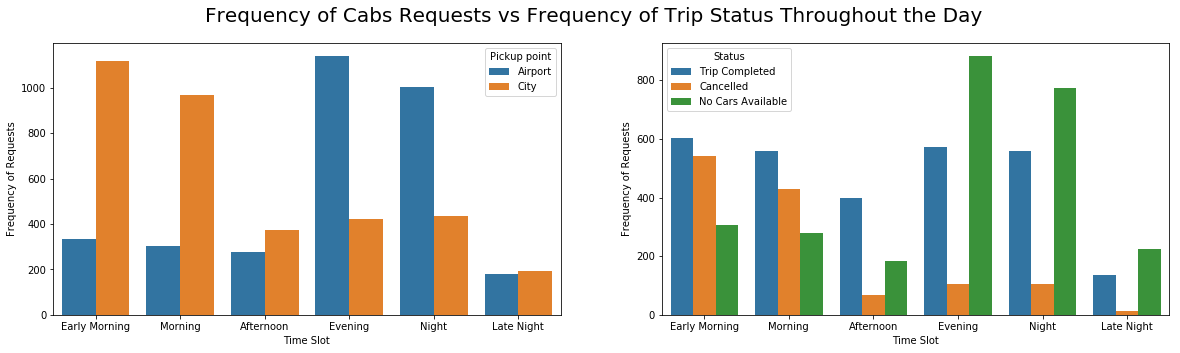

In [46]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Frequency of Cabs Requests vs Frequency of Trip Status Throughout the Day', fontsize=20)
order_series = ["Early Morning", "Morning","Afternoon", "Evening", "Night","Late Night"]
plt.subplot(121)
sns.countplot(x='req_slot',hue='Pickup point',order =order_series, data = data_df)
plt.xlabel('Time Slot')
plt.ylabel('Frequency of Requests')
plt.subplot(122)
sns.countplot(x='req_slot',hue='Status',order=order_series,data = data_df)
plt.xlabel('Time Slot')
plt.ylabel('Frequency of Requests')
plt.show()

<Figure size 1440x504 with 0 Axes>

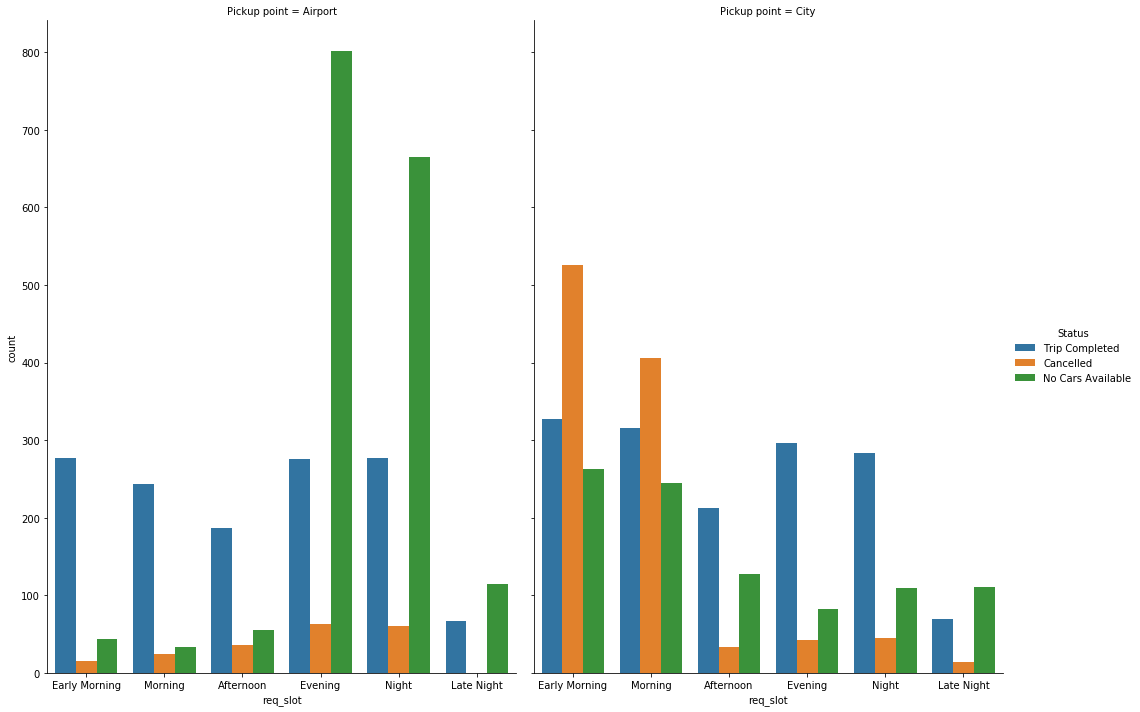

In [37]:
#Deriving different metrices.
#One for Airport to City Data - data_df_a2c
#Other for City to Airport Data - data_df_c2a
data_df_c2a = data_df.loc[data_df['Pickup point'] == 'City']  #lower case
data_df_a2c = data_df.loc[data_df['Pickup point'] == 'Airport']

#Now we will plot Frequency of Requests from Airpot/City throughout the Day

fig = plt.figure(figsize=(20,7))

order_series = ["Early Morning", "Morning","Afternoon", "Evening", "Night","Late Night"]
ax =sns.catplot(x='req_slot',hue="Status",data=data_df, col="Pickup point",kind="count",order = order_series,height=10, aspect=.7)

plt.show()


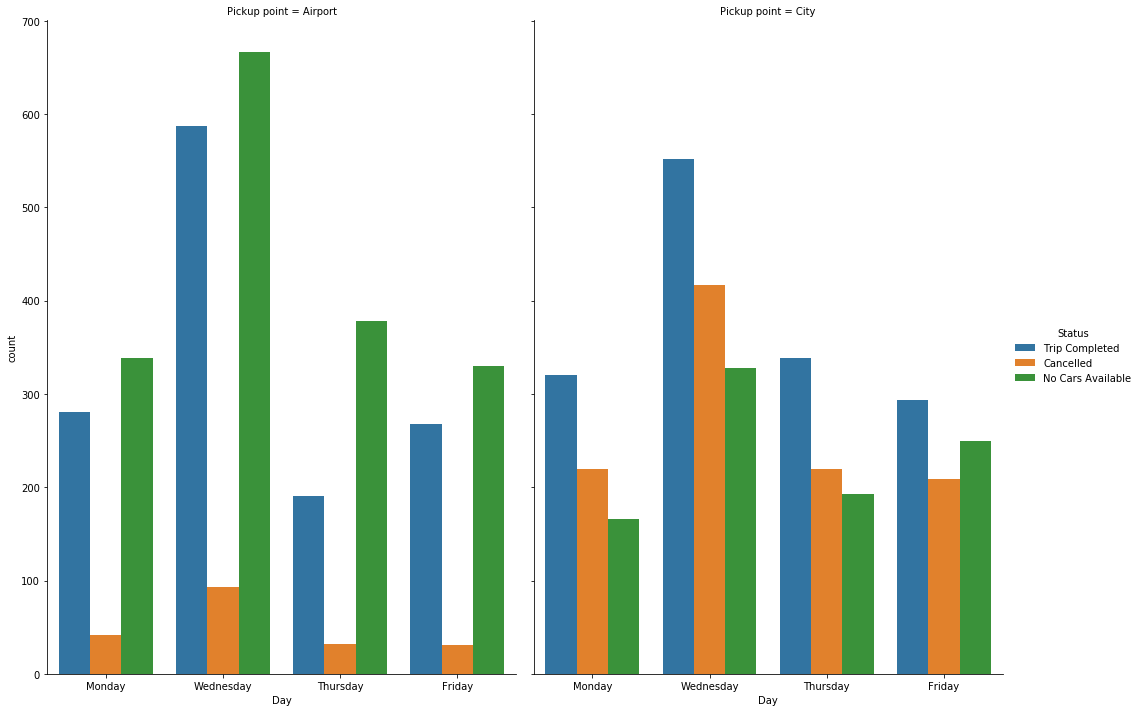

In [22]:
#Frequency of Trip Status from Airport/City Throughout the day
sns.catplot(x='Day',hue="Status",data=data_df, col="Pickup point",kind="count",height=10, aspect=.7)
plt.show()


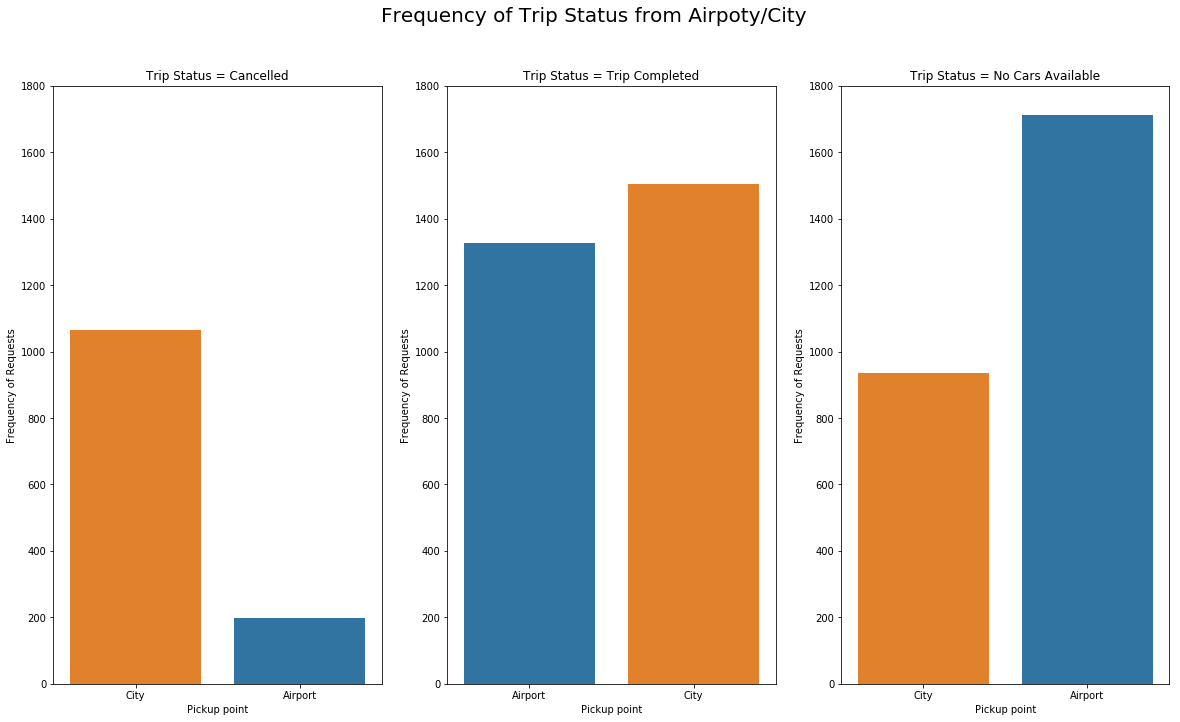

In [76]:
#Frequency of Trip Status from Airpoty/City
fig = plt.figure(figsize=(20,11))
fig.suptitle('Frequency of Trip Status from Airpoty/City', fontsize=20)
plt.subplot(131)
sns.countplot(x='Pickup point',palette=["C1", "C0"], data=(data_df.loc[data_df['Status'] == 'Cancelled']))
plt.ylabel('Frequency of Requests')
plt.yticks([0,200,400,600,800,1000,1200,1400,1600,1800])
plt.title('Trip Status = Cancelled')
plt.subplot(132)
sns.countplot(x='Pickup point',palette=["C0", "C1"], data=(data_df.loc[data_df['Status'] == 'Trip Completed']))
plt.ylabel('Frequency of Requests')
plt.yticks([0,200,400,600,800,1000,1200,1400,1600,1800])
plt.title('Trip Status = Trip Completed')
plt.subplot(133)
sns.countplot(x='Pickup point',palette=["C1", "C0"], data=(data_df.loc[data_df['Status'] == 'No Cars Available']))
plt.ylabel('Frequency of Requests')
plt.yticks([0,200,400,600,800,1000,1200,1400,1600,1800])
plt.title('Trip Status = No Cars Available')
plt.show()

Statistics of Cab Requests Status from Airport to City

Status         Cancelled  No Cars Available  Trip Completed
req_slot                                                   
Afternoon           36.0               55.0           187.0
Early Morning       15.0               44.0           277.0
Evening             63.0              801.0           276.0
Late Night           NaN              114.0            67.0
Morning             24.0               34.0           243.0
Night               60.0              665.0           277.0



Statistics of Cab Requests Status from City to Airport

Status         Cancelled  No Cars Available  Trip Completed
req_slot                                                   
Afternoon             33                127             213
Early Morning        526                263             327
Evening               42                 82             296
Late Night            14                111              69
Morning              406                245  

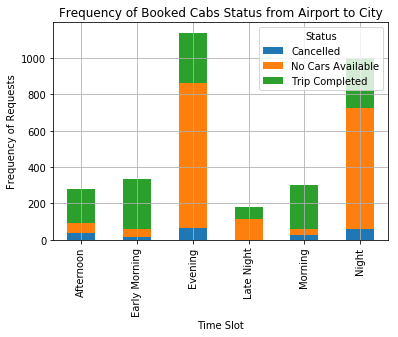

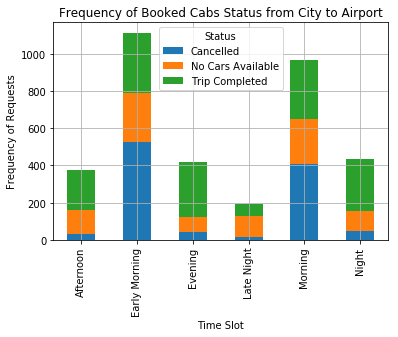

In [41]:
#Statistics and plot of Cab Status in throughout the day

print('Statistics of Cab Requests Status from Airport to City\n')
props1 = data_df_a2c.groupby("req_slot")['Status'].value_counts(normalize=False).unstack()
print(props1)
print("\n\n")

print('Statistics of Cab Requests Status from City to Airport\n')
props2 = data_df_c2a.groupby("req_slot")['Status'].value_counts(normalize=False).unstack()
print(props2)

props1.plot(kind='bar', stacked='True', title= 'Frequency of Booked Cabs Status from Airport to City', grid=True,sort_columns=False)
plt.ylabel('Frequency of Requests')
plt.xlabel('Time Slot')
props2.plot(kind='bar', stacked='True', title= 'Frequency of Booked Cabs Status from City to Airport', grid=True,sort_columns=False)
plt.ylabel('Frequency of Requests')
plt.xlabel('Time Slot')
plt.show()


In [327]:
#Findings - 
#Most often, drivers cancels their trip from city to airport, specially Morning 5AM to 9AM
#There are less chances of drivers, cancelling the trip from Airport.
# Cars are not at all availavle at airport from 5PM to 9PM.


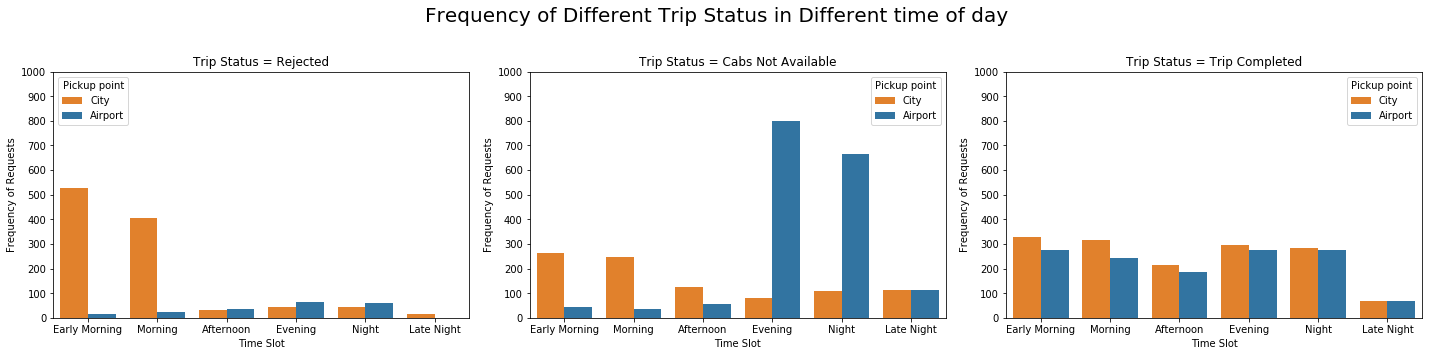

In [55]:
reject_data = data_df.loc[data_df['Status'] == 'Cancelled']
cars_na_data = data_df.loc[data_df['Status'] == 'No Cars Available']
trip_comp_data = data_df.loc[data_df['Status'] == 'Trip Completed']
fig = plt.figure(figsize=(20,5))
fig.suptitle("Frequency of Different Trip Status in Different time of day",fontsize=20)
plt.subplot(131)
sns.countplot(x='req_slot',hue='Pickup point',palette=["C1", "C0"], data=reject_data,order=order_series)
plt.ylabel('Frequency of Requests')
plt.xlabel('Time Slot')
plt.title('Trip Status = Rejected')
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000])

plt.subplot(132)
sns.countplot(x='req_slot',hue='Pickup point', palette=["C1", "C0"], data=cars_na_data,order=order_series)
plt.ylabel('Frequency of Requests')
plt.xlabel('Time Slot')
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.title('Trip Status = Cabs Not Available')
plt.subplot(133)
sns.countplot(x='req_slot',hue='Pickup point', palette=["C1", "C0"], data=trip_comp_data,order=order_series, hue_order=['City', 'Airport'])
plt.ylabel('Frequency of Requests')
plt.xlabel('Time Slot')
plt.ylim(0, 1000)
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.title('Trip Status = Trip Completed')
fig.tight_layout()
fig.subplots_adjust(top=0.80)
plt.show()

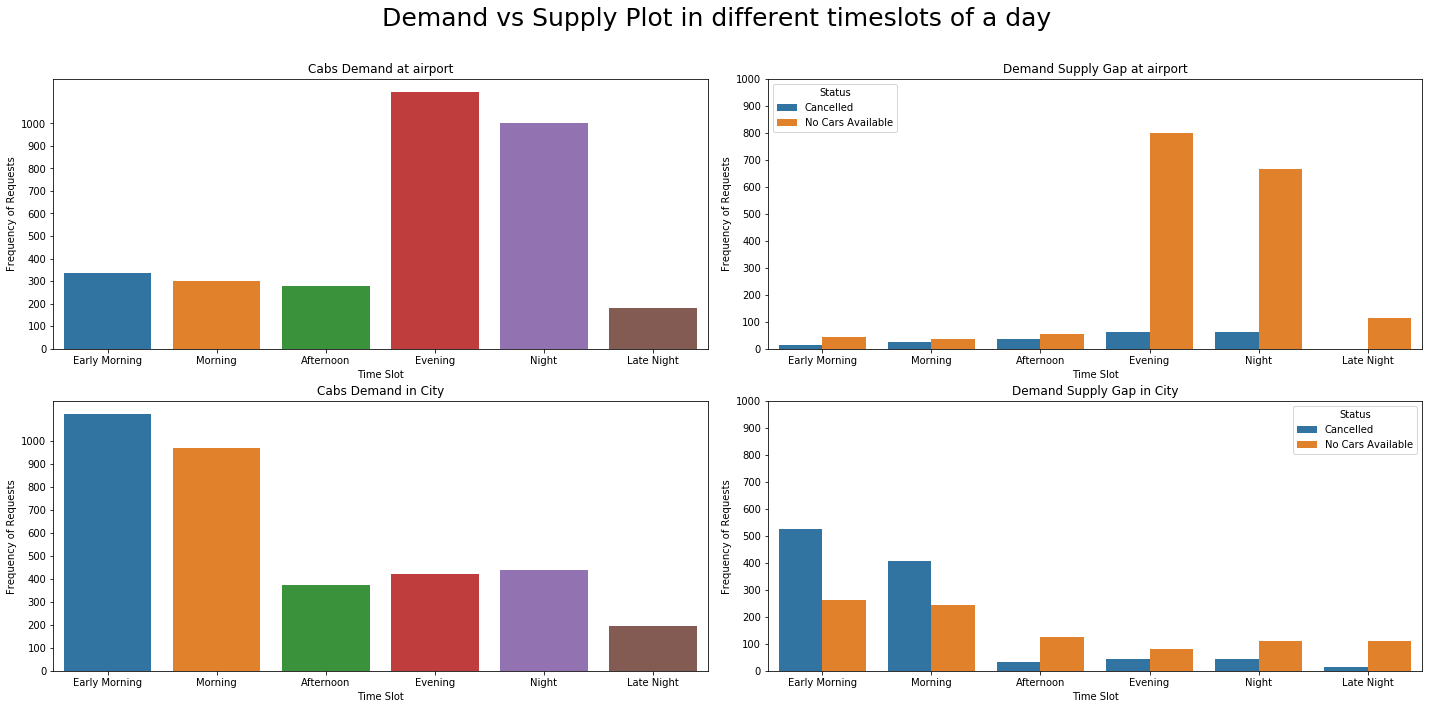

In [97]:
#Demand vs Supply Plot
fig= plt.figure(figsize=(20,10))
fig.suptitle("Demand vs Supply Plot in different timeslots of a day", fontsize=25)
plt.subplot(221)
sns.countplot(x='req_slot',data=data_df.loc[data_df['Pickup point'] == 'Airport'], order=order_series)
plt.ylabel('Frequency of Requests')
plt.xlabel('Time Slot')
plt.title("Cabs Demand at airport")
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.subplot(222)
sns.countplot(x='req_slot',hue= 'Status', data=data_df.loc[(data_df['Status'] != 'Trip Completed') & (data_df['Pickup point'] == 'Airport')], order=order_series)
plt.ylabel('Frequency of Requests')
plt.xlabel('Time Slot')
plt.title("Demand Supply Gap at airport")
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000])

plt.subplot(223)
sns.countplot(x='req_slot',data=data_df.loc[data_df['Pickup point'] == 'City'], order=order_series)
plt.ylabel('Frequency of Requests')
plt.xlabel('Time Slot')
plt.title("Cabs Demand in City")
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.subplot(224)
sns.countplot(x='req_slot',hue= 'Status',data=data_df.loc[(data_df['Status'] != 'Trip Completed') & (data_df['Pickup point'] == 'City')], order=order_series)
plt.ylabel('Frequency of Requests')
plt.xlabel('Time Slot')
plt.title("Demand Supply Gap in City")
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000])
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

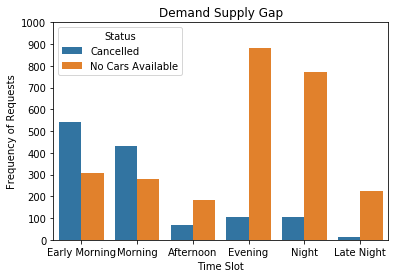

In [92]:
#Plotting Demand-Supply Gap
sns.countplot(x='req_slot',hue='Status', data=data_df.loc[(data_df['Status'] == 'Cancelled') | (data_df['Status'] == 'No Cars Available')], order=order_series)
plt.ylabel('Frequency of Requests')
plt.xlabel('Time Slot')
plt.title("Demand Supply Gap")
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.show()

In [59]:
print('Supply - Demand Metric\n')

print("Demand")
props1 = data_df.groupby("req_slot")['Pickup point'].value_counts(normalize=False).unstack()
print(props1)
print("\n\n")
print("Supply")
print('Statistics of Cab Requests Status from City to Airport\n')
props2 = (data_df.loc[data_df['Status'] == 'Trip Completed']).groupby("req_slot")['Pickup point'].value_counts(normalize=False).unstack()
print(props2)


Supply - Demand Gap Metric

Demand
Pickup point   Airport  City
req_slot                    
Afternoon          278   373
Early Morning      336  1116
Evening           1140   420
Late Night         181   194
Morning            301   967
Night             1002   437



Supply
Statistics of Cab Requests Status from City to Airport

Pickup point   Airport  City
req_slot                    
Afternoon          187   213
Early Morning      277   327
Evening            276   296
Late Night          67    69
Morning            243   316
Night              277   283


In [94]:
print('Supply - Demand Gap Metric\n')

print('Statistics of Demand Supply Gap\n')
props3 = (data_df.loc[(data_df['Status'] == 'Cancelled') | (data_df['Status'] == 'No Cars Available')]).groupby("req_slot")['Status'].value_counts(normalize=False).unstack()
print(props3)


Supply - Demand Gap Metric

Statistics of Demand Supply Gap

Status         Cancelled  No Cars Available
req_slot                                   
Afternoon             69                182
Early Morning        541                307
Evening              105                883
Late Night            14                225
Morning              430                279
Night                105                774
